## Modeling Procedures
1. Plot the time series data
2. If needed apply variance transformations to stabilize variance(box cox)
   - Cannot apply log to negative time series, so always apply the variance transformations before differencing 
3. If needed, take differences to make it stationary
4. Examine ACF AND PACF of the differenced time series to obtain the order of the model
   - Try to determine candidate models
5. Check the residuals of the model, if residuals look like white noise, then model is good becuase it has no structure, and the model has a good fit:
   - $\hat{\epsilon_t} = X_t - \hat{X_t}$
6. Use selection criteria (AIC, SBC, HQ) to select the best model
7. Use the best model to compute forecasts.

Identification
Estimation
Diagnostic Checking 
Model Selection
Forecasting
Identification
 | ACF | # PCF
---|---|---
AR(P) | tails off  | cuts off after lag P
MA(Q) | cuts off after lag q | tails off 
Estimation
- MLE Method (maximum likelihood estimation method)
  - (minimise function of residuals)

- OLS Method 
  - For AR(p) but **not for MA(q) model**

Quality of parameter estimates:
- hypothesis estimate $H_0 : \beta_j = 0 vs H_1: \beta_j \ne 0$
Check whether the residuals are white noise
- $H_0 : \rho^R_k = 0 vs H_1: \rho_k^R \ne 0$

## ARMA Models: Identification, Estimation, Testing, Selection
### Model Identification
1. Plot the time series and examine whether the series contains a trend, seasonality, outliers, non-constant variances and other nonstationary phenomena. Choose proper **variance-stabilizing** (Box-Cox’s power transformation) and **differencing transformations**.
2. Compute the **sample ACF** and the **sample PACF** of the original series and identify the degree of differencing d to achieve stationarity, $(1 − 𝐵)^d 𝑋_t$ . In practice, d is either 0, 1, or 2.
3. Compute the **sample ACF** and the **sample PACF** of the stationary series and identify the orders p and q for the **autoregressive** and **moving average** operators. Usually, the needed orders of integers p and q are less or equal to 3.
4. In general, find models with good economic meaning; can have significant correlation at high lags but the inference cannot be drawn. Try to build simple models with small parameters. 

## Modelling Example
Here we have some nonstationary time series data relating to the number of internet users per minute. 
Below is plotted the sample PACF, ACF, and the time series model. 

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


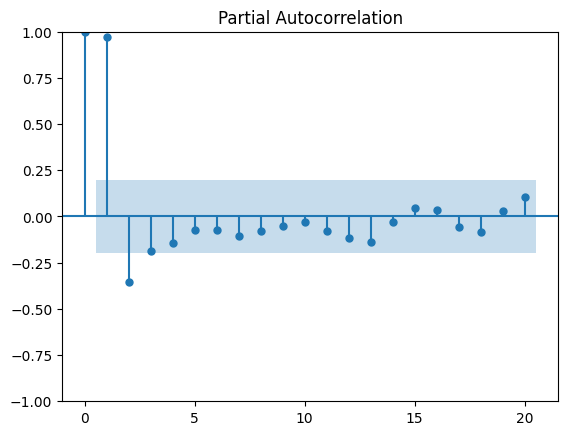

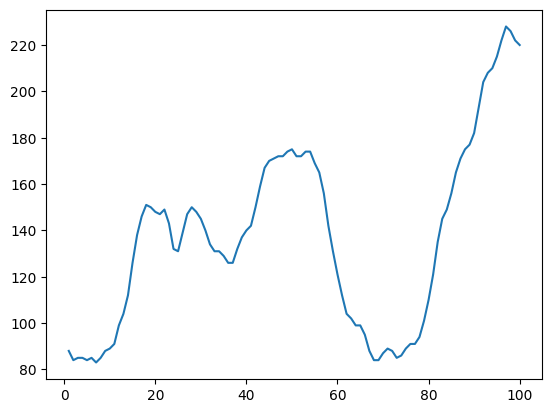

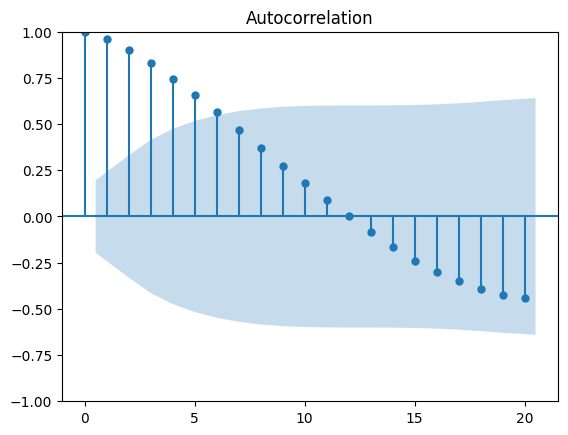

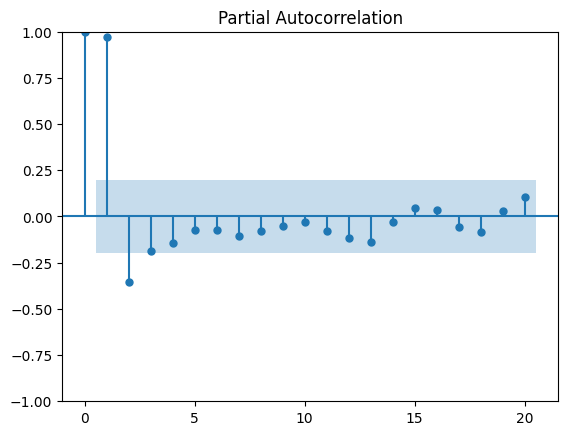

In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

df = pd.read_csv(r'/Users/dhruvpandit/Documents/GitHub/ISEG_AEF/STEM-EAP17/WWWusage.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
plt.plot(df['time'], df['value'])
tsaplots.plot_acf(df['value'])
tsaplots.plot_pacf(df['value'])


### Differencing Model
We now difference the model with order 1, to induce stationarity. Below plotted is the differenced time series, as well as the ACF and the PACF of the differenced time series. 

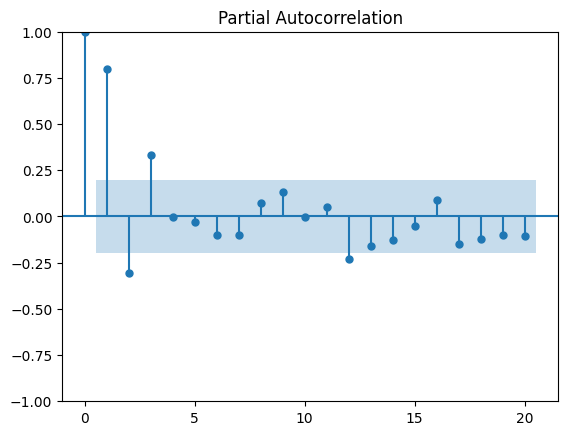

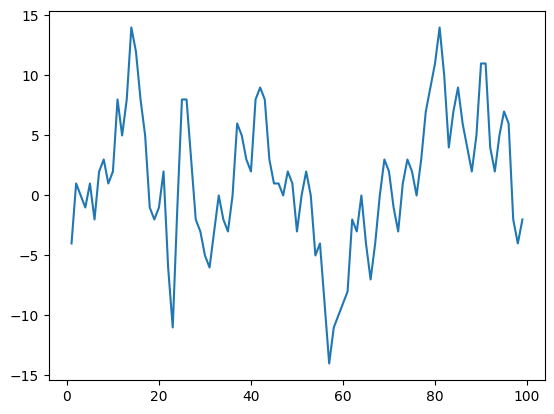

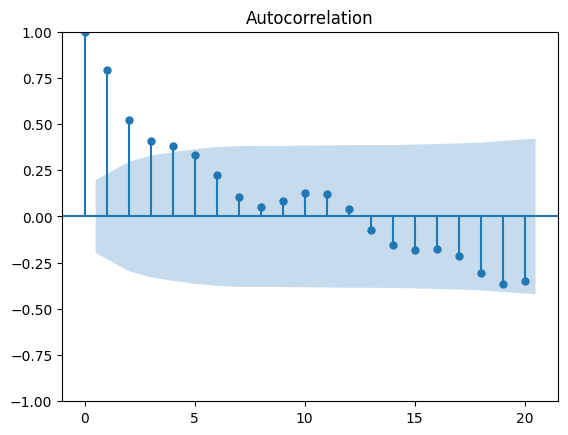

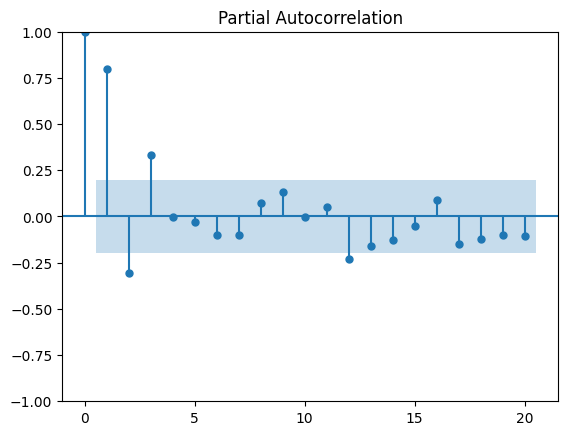

In [12]:
differenced = sm.tsa.statespace.tools.diff(df['value'])
plt.plot( differenced)
tsaplots.plot_acf(differenced)
tsaplots.plot_pacf(differenced)


In [33]:
import numpy as np
differenced = np.array(differenced)

### Model Fitting Using AutoReg
We are now ready to fit the model using AutoReg. Observed above is the PACF cutting off after lag 3, and the ACF decaying in a sinusoidal manner. As such , the model is fitted to AR(3).

In [80]:
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(endog=differenced, lags=3).fit()
res.summary()
from statsmodels.tsa.statespace.sarimax import SARIMAX
res3 = SARIMAX(df['value'], order = (3, 1, 2)).fit()
res3.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52141D+00    |proj g|=  3.02169D-02

At iterate    5    f=  2.51988D+00    |proj g|=  6.87900D-03

At iterate   10    f=  2.51965D+00    |proj g|=  5.08967D-03

At iterate   15    f=  2.51959D+00    |proj g|=  7.13882D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     17      1     0     0   7.139D-06   2.520D+00
  F =   2.5195919294948199     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  100
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -251.959
Date:                Wed, 02 Nov 2022   AIC                            515.918
Time:                        20:20:26   BIC                            531.489
Sample:                             0   HQIC                           522.218
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0711      0.470      2.279      0.023       0.150       1.992
ar.L2         -0.6013      0.367     -1.636      0.102      -1.322       0.119
ar.L3          0.3364      0.184      1.829      0.067      -0.024       0.697
ma.L1          0.0879      0.467      0.188      0.851      -0.827       1.003
ma.L2          0.0300      0.344      0.087      0.930      -0.643       0.703
sigma2         9.3556      1.424      6.571      0.000       6.565      12.146
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.90   Prob(JB):                         0.91
Heteroskedasticity (H):               0.54   Skew:                            -0.11
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

For the fitted model, the residuals should be have a white noise proccess with mean $\mu = 0$, and the ACF and PACF after lag 0 be null.
This would indicate that our fitted model is a good approximation.
## Model Selection
Suppose you have two, or three models to choose from. Which ones should you pick?
Akaike Information Criteria (AIC)
- tends to overestimate
- Lowest AIC is the one to go to
- 
  
Schwartz Bayesian criterion (SBC):


In [81]:
a = res3.predict(start = df['time'].head(1).values[0], end= df['time'].tail(1).values[0] + 60)

In [88]:
len(range(df['time'].head(1).values[0], (df['time'].tail(1).values[0] + 60)))

159

In [89]:
len(a)

160

In [90]:
df_pred = pd.DataFrame({
    'pred' : a,
    'time' : range(df['time'].head(1).values[0], (df['time'].tail(1).values[0] + 61))
})
ad = pd.Series(df_pred[])

,pred,time
1,88.002332,1
2,80.784917,2
3,87.263337,3
4,82.972150,4
5,83.295881,5
...,...,...
156,213.209386,156
157,213.209346,157
158,213.209312,158
159,213.209284,159


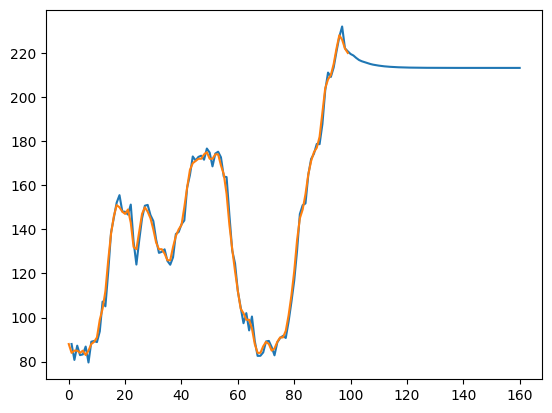

In [82]:
plt.plot(a)
plt.plot(df['value'])

/opt/homebrew/lib/python3.10/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


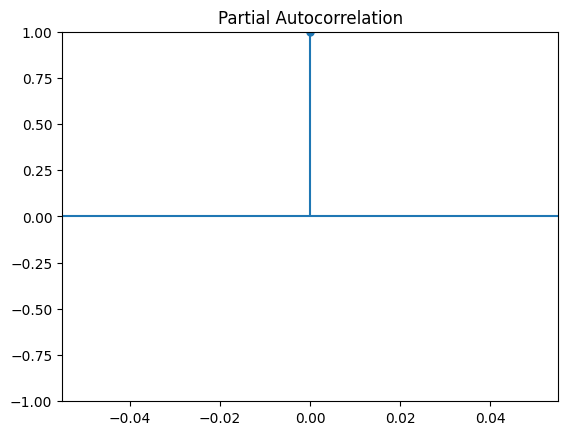

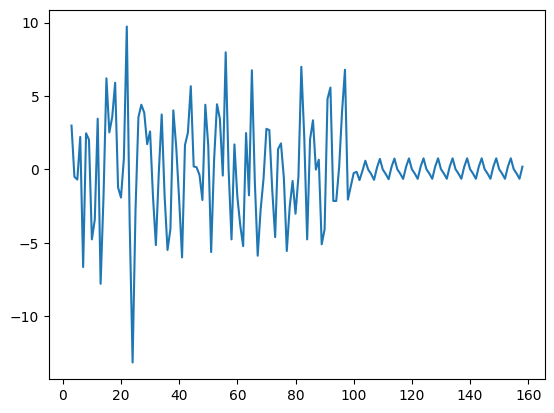

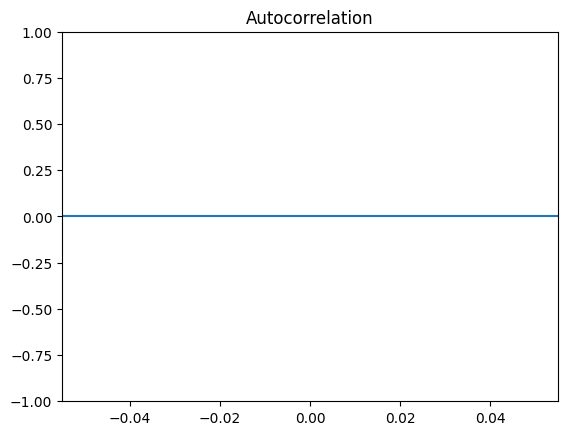

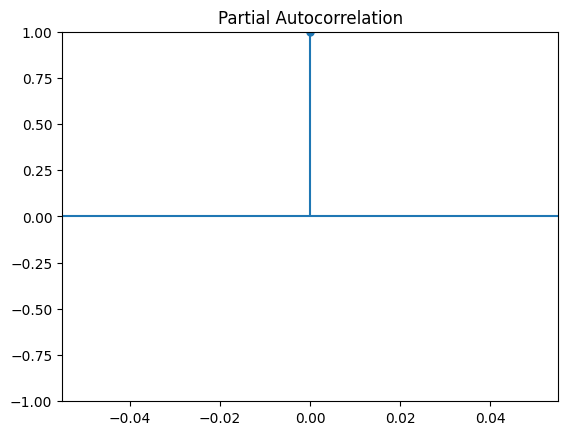

In [101]:
ad = pd.Series(a, index = df_pred['time'])
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ad, model='additive', period = 5)
plt.plot(decomp.resid)
decomp.resid


## ARIMA Models
### Nonstationary Model in Mean
The mean can be represented by two models:
1. **Deterministic Model**:
   - $X_t = a + bt + a_t$
2. **Quadratic Model**:
   -  $ X_t = a + bt +ct^2 + a_t$

### Random Walk Model
A special case of the nonstationary models is the stochastic trend model:
- $X_t = X_{t-1} + a_t$
  - $\mu is 0$
  - $Var(X_t) = t\sigma^2_a$ ; depends on time
  - $Cov(X_t, X_{t-k}) = (t-k)\sigma^2_a$
  - $\rho_{t, t-k} = \sqrt{\frac{t-k}{t}}$ which tends to 1 for a large *t*
- 
The random walk model **with drift** is :
- $X_t = c + X_{t-1} + a_t$
  - where *c* is the drift

### ARIMA Model
A general model for representing nonstationary nonseasonal time series is given by the autoregressive integrated moving average ARIMA(p,d,q) 

* $(1 - \phi_1 B - ... \phi_p B^p)(1-B)^d X_t = (1-\theta_1 B - ... \theta_q B^q)a_t$

or

* $ \phi_p(B)(1-B)^d X_t = \theta_q(B)a_t$

where $(1 − 𝐵)^d$ is the differencing operator of order d, for $d \ge 1,\phi_p(B)$
is a stationary autoregressive (AR) operator, $\theta (B)$ is an invertible moving average (MA) operator and $a_t$ is a zero mean white noise.
Some important special cases of the ARIMA model are ARIMA(0,1,0), ARIMA(1,1,0), ARIMA(0,1,1) and ARIMA (1,1,1) models.

#### Generalising
Once the differentiating d parameter is established, apply the ARMA techniques previously discussed to the differenced time series 𝑌 .
In general, when fitting an ARIMA(p,d,q) to a set of time series, the following procedures are useful:
1. Plot the time series data and try to understand patterns
2. If needed, transform time series data to stabilize variance (use Box-Cox’s power transformation)
3. If needed, transform time series data to make it stationary (use differencing transformations).
4. Examine the sample ACF and PACF of the differenced time series data and try to identify possible candidate models
5. Check the residuals from chosen models and, if needed, try modified models
6. Use model selection criteria (AIC, HQ, SBC) to select the “best model”
7. Use the model to compute forecasts
 
